In [1]:
import os
from tempfile import tempdir
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path

import tqdm
import importlib

import matplotlib.pyplot as plt
# from PySide2.QtWidgets import QFileDialog, QApplication
# from PySide2.QtCore import Qt
from copy import copy 

from corems.mass_spectra.input import rawFileReader
from corems.molecular_id.factory.classification import HeteroatomsClassification, Labels
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.encapsulation.factory.parameters import MSParameters
from corems.encapsulation.constant import Atoms
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

import corems.lc_icpms_ftms.calc.lc_icrms_qc_assign as icrms
import corems.lc_icpms_ftms.calc.lc_icrms_helpers as lcmsfns

import importlib


In [2]:
# get files & parsers

dir='/Volumes/Samsung_T5/NHMFL/2023_January_Christian/wastewater/Zorbax_5um_inject_1500ms/neg/subset'
flist=os.listdir(dir)
os.chdir(dir)

# get parsers

MSfiles={}

for f in flist:
    if ('.raw' in f) & ('._' not in f) & ('qh2o' not in f):
        print(f)
        parser = rawFileReader.ImportMassSpectraThermoMSFileReader(f)
        MSfiles[f]={'parser': parser}

data = icrms.lc_icr_assign(dir)

data.master_data_holder = MSfiles

data._raw_filelist = data.master_data_holder.keys()

20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_300_500_01.raw
20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_fullmz_01.raw


In [5]:
# set assignment parameters
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.25
MSParameters.molecular_search.max_ppm_error = 0.25

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"

MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,3)
MSParameters.molecular_search.usedAtoms['I'] = (0,1)
MSParameters.molecular_search.usedAtoms['F'] = (0,1)
MSParameters.molecular_search.usedAtoms['Cl'] = (0,1)
MSParameters.molecular_search.usedAtoms['S'] = (0,1)


In [6]:
# run assignment algorithm
timerange = [6,20]  # start (min) to stop (min)
interval = 2  # min 
refmasslist = "/Users/christiandewey/CoreMS/db/Hawkes_neg.ref"

data.assign_formula(interval = interval, timerange = timerange, 
    refmasslist = refmasslist, calorder =2, charge = 1, cal_ppm_threshold= (0,3))
#data_df = lcmsfns.assign_formula(parser=parser, interval = interval, timerange = timerange, refmasslist = refmasslist, calorder =2, charge = -1)

data_df = data.complete_results_df



20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_300_500_01.raw
1 of 2 files
timestart: 6
negative
MS Obj loaded - 780 peaks found.
MS Obj loaded - 780 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
111 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.039 ppm
minimize function performed 353 fn evals and 7 iterations
'runworker'  27.97 ms


Loading molecular formula database: 244699it [00:07, 34699.17it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 292.88it/s]        
Loading molecular formula database: 247072it [00:07, 34628.43it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 345.44it/s]        
Loading molecular formula database: 249470it [00:07, 32238.73it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 333.39it/s]                
Loading molecular formula database: 251117it [00:07, 35011.57it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 397.79it/s]
Loading molecular formula database: 66593it [00:02, 32544.29it/s]
Started molecular 

'run_molecular_formula'  34896.75 ms
710 assigned peaks and 70 unassigned peaks, total  = 91.03 %, relative abundance = 94.40 %, RMS error (best candidate) (ppm) = 0.048
timestart: 8
negative
MS Obj loaded - 515 peaks found.
MS Obj loaded - 515 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
91 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.034 ppm
minimize function performed 363 fn evals and 7 iterations
'runworker'  27.66 ms


Loading molecular formula database: 244699it [00:07, 34695.68it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 255.87it/s]        
Loading molecular formula database: 247072it [00:07, 31664.37it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 407.78it/s]        
Loading molecular formula database: 249470it [00:07, 32950.56it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 380.39it/s]                
Loading molecular formula database: 251117it [00:07, 33419.83it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 554.10it/s]
Loading molecular formula database: 66593it [00:01, 37265.85it/s]
Started molecular 

'run_molecular_formula'  35160.07 ms
457 assigned peaks and 58 unassigned peaks, total  = 88.74 %, relative abundance = 60.86 %, RMS error (best candidate) (ppm) = 0.041
timestart: 10
negative
MS Obj loaded - 565 peaks found.
MS Obj loaded - 565 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
102 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.031 ppm
minimize function performed 356 fn evals and 7 iterations
'runworker'  27.94 ms


Loading molecular formula database: 244699it [00:07, 34385.41it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 261.28it/s]        
Loading molecular formula database: 247072it [00:07, 31130.70it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 423.44it/s]        
Loading molecular formula database: 249470it [00:07, 32566.08it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 408.56it/s]                
Loading molecular formula database: 251117it [00:07, 32550.55it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 406.60it/s]
Loading molecular formula database: 66593it [00:01, 36614.04it/s]
Started molecular 

'run_molecular_formula'  35777.76 ms
538 assigned peaks and 27 unassigned peaks, total  = 95.22 %, relative abundance = 95.88 %, RMS error (best candidate) (ppm) = 0.039
timestart: 12
negative
MS Obj loaded - 1102 peaks found.
MS Obj loaded - 1102 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
125 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.129 ppm
minimize function performed 316 fn evals and 6 iterations
'runworker'  28.15 ms


Loading molecular formula database: 244699it [00:07, 31009.33it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 119.18it/s]        
Loading molecular formula database: 247072it [00:07, 33255.09it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 211.02it/s]        
Loading molecular formula database: 249470it [00:08, 30988.35it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 202.04it/s]                
Loading molecular formula database: 251117it [00:08, 29756.87it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 253.05it/s]
Loading molecular formula database: 66593it [00:01, 45333.24it/s]
Started molecular 

'run_molecular_formula'  40130.74 ms
905 assigned peaks and 197 unassigned peaks, total  = 82.12 %, relative abundance = 94.78 %, RMS error (best candidate) (ppm) = 0.061
timestart: 14
negative
MS Obj loaded - 642 peaks found.
MS Obj loaded - 642 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
100 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.147 ppm
minimize function performed 314 fn evals and 6 iterations
'runworker'  33.47 ms


Loading molecular formula database: 244699it [00:07, 30971.08it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 197.49it/s]        
Loading molecular formula database: 247072it [00:07, 31129.04it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 354.64it/s]        
Loading molecular formula database: 249470it [00:07, 31447.71it/s]
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 395.08it/s]                
Loading molecular formula database: 251117it [00:07, 34765.21it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 450.32it/s]
Loading molecular formula database: 66593it [00:01, 34593.82it/s]
Started molecular f

'run_molecular_formula'  36922.10 ms
601 assigned peaks and 41 unassigned peaks, total  = 93.61 %, relative abundance = 97.39 %, RMS error (best candidate) (ppm) = 0.043
timestart: 16
negative
MS Obj loaded - 624 peaks found.
MS Obj loaded - 624 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
103 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.111 ppm
minimize function performed 314 fn evals and 6 iterations
'runworker'  28.79 ms


Loading molecular formula database: 244699it [00:08, 30561.10it/s]
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 190.58it/s]        
Loading molecular formula database: 247072it [00:07, 33282.55it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 366.81it/s]        
Loading molecular formula database: 249470it [00:08, 29718.20it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 403.42it/s]                
Loading molecular formula database: 251117it [00:07, 31662.00it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 482.32it/s]
Loading molecular formula database: 66593it [00:01, 44206.34it/s]
Started molecular f

'run_molecular_formula'  37241.85 ms
595 assigned peaks and 29 unassigned peaks, total  = 95.35 %, relative abundance = 98.38 %, RMS error (best candidate) (ppm) = 0.039
timestart: 18
negative
MS Obj loaded - 1041 peaks found.
MS Obj loaded - 1041 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
115 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.076 ppm
minimize function performed 315 fn evals and 6 iterations
'runworker'  28.10 ms


Loading molecular formula database: 244699it [00:07, 31986.27it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 125.78it/s]        
Loading molecular formula database: 247072it [00:08, 30514.94it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 236.79it/s]        
Loading molecular formula database: 249470it [00:08, 30802.34it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 210.50it/s]                
Loading molecular formula database: 251117it [00:07, 34545.90it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 293.42it/s]
Loading molecular formula database: 66593it [00:02, 30940.99it/s]
Started molecular 

'run_molecular_formula'  39584.41 ms
877 assigned peaks and 164 unassigned peaks, total  = 84.25 %, relative abundance = 96.81 %, RMS error (best candidate) (ppm) = 0.055


20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_fullmz_01.raw
2 of 2 files
timestart: 6
negative
MS Obj loaded - 493 peaks found.
MS Obj loaded - 493 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
83 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 359 fn evals and 7 iterations
'runworker'  28.67 ms


Loading molecular formula database: 244699it [00:07, 32655.15it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 298.14it/s]        
Loading molecular formula database: 247072it [00:08, 30735.22it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 414.59it/s]        
Loading molecular formula database: 249470it [00:07, 31370.25it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 392.16it/s]                
Loading molecular formula database: 251117it [00:08, 30872.89it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 441.30it/s]
Loading molecular formula database: 66593it [00:02, 33006.98it/s]
Started molecular 

'run_molecular_formula'  37180.28 ms
430 assigned peaks and 63 unassigned peaks, total  = 87.22 %, relative abundance = 94.50 %, RMS error (best candidate) (ppm) = 0.053
timestart: 8
negative
MS Obj loaded - 372 peaks found.
MS Obj loaded - 372 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
60 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 360 fn evals and 7 iterations
'runworker'  27.96 ms


Loading molecular formula database: 244699it [00:07, 30652.22it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 423.21it/s]        
Loading molecular formula database: 247072it [00:07, 33671.81it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 521.79it/s]        
Loading molecular formula database: 249470it [00:08, 29943.37it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 459.30it/s]                
Loading molecular formula database: 251117it [00:08, 31031.50it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 534.95it/s]
Loading molecular formula database: 66593it [00:02, 31881.32it/s]
Started molecular 

'run_molecular_formula'  36691.89 ms
302 assigned peaks and 70 unassigned peaks, total  = 81.18 %, relative abundance = 66.82 %, RMS error (best candidate) (ppm) = 0.056
timestart: 10
negative
MS Obj loaded - 499 peaks found.
MS Obj loaded - 499 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
84 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 322 fn evals and 6 iterations
'runworker'  29.02 ms


Loading molecular formula database: 244699it [00:07, 32332.88it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 332.52it/s]        
Loading molecular formula database: 247072it [00:07, 31956.48it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 419.92it/s]        
Loading molecular formula database: 249470it [00:08, 28962.94it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 374.67it/s]                
Loading molecular formula database: 251117it [00:07, 31717.99it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 437.14it/s]
Loading molecular formula database: 66593it [00:01, 36812.22it/s]
Started molecular 

'run_molecular_formula'  37130.36 ms
426 assigned peaks and 73 unassigned peaks, total  = 85.37 %, relative abundance = 93.43 %, RMS error (best candidate) (ppm) = 0.055
timestart: 12
negative
MS Obj loaded - 728 peaks found.
MS Obj loaded - 728 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.039 ppm
minimize function performed 322 fn evals and 6 iterations
'runworker'  27.74 ms


Loading molecular formula database: 244699it [00:08, 29248.84it/s] 
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 157.07it/s]        
Loading molecular formula database: 247072it [00:08, 29206.44it/s] 
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 216.01it/s]        
Loading molecular formula database: 249470it [00:09, 27668.27it/s] 
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 151.50it/s]                
Loading molecular formula database: 251117it [00:08, 28611.66it/s] 
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 125.91it/s]
Loading molecular formula database: 66593it [00:02, 30270.72it/s]
Started molecular 

'run_molecular_formula'  44978.38 ms
603 assigned peaks and 125 unassigned peaks, total  = 82.83 %, relative abundance = 92.60 %, RMS error (best candidate) (ppm) = 0.059
timestart: 14
negative
MS Obj loaded - 1054 peaks found.
MS Obj loaded - 1054 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
154 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.075 ppm
minimize function performed 370 fn evals and 8 iterations
'runworker'  27.64 ms


Loading molecular formula database: 244699it [00:08, 27271.65it/s]
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 92.35it/s]         
Loading molecular formula database: 247072it [00:09, 25810.84it/s]
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 108.99it/s]        
Loading molecular formula database: 249470it [00:10, 24878.46it/s]
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 97.09it/s]                 
Loading molecular formula database: 251117it [00:08, 27955.20it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 51.71it/s] 
Loading molecular formula database: 66593it [00:02, 23486.42it/s]
Started molecular form

'run_molecular_formula'  57203.70 ms
828 assigned peaks and 226 unassigned peaks, total  = 78.56 %, relative abundance = 94.83 %, RMS error (best candidate) (ppm) = 0.076
timestart: 16
negative
MS Obj loaded - 985 peaks found.
MS Obj loaded - 985 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
152 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.064 ppm
minimize function performed 408 fn evals and 9 iterations
'runworker'  28.03 ms


Loading molecular formula database: 244699it [00:08, 27471.63it/s]
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 115.20it/s]        
Loading molecular formula database: 247072it [00:09, 26267.86it/s]
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 175.93it/s]        
Loading molecular formula database: 249470it [00:10, 24682.20it/s]
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 104.51it/s]                
Loading molecular formula database: 251117it [00:09, 27499.38it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:04<00:00, 71.07it/s] 
Loading molecular formula database: 66593it [00:02, 27734.42it/s]
Started molecular form

'run_molecular_formula'  53189.61 ms
814 assigned peaks and 171 unassigned peaks, total  = 82.64 %, relative abundance = 95.95 %, RMS error (best candidate) (ppm) = 0.075
timestart: 18
negative
MS Obj loaded - 873 peaks found.
MS Obj loaded - 873 peaks found.
Reference mass list loaded - 2030 calibration masses loaded.
144 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.059 ppm
minimize function performed 408 fn evals and 9 iterations
'runworker'  28.11 ms


Loading molecular formula database: 244699it [00:09, 26154.72it/s]
Started molecular formula search for class {"S": 1, "O": 19, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 148.69it/s]        
Loading molecular formula database: 247072it [00:09, 27362.48it/s]
Started molecular formula search for class {"N": 1, "O": 18, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 230.14it/s]        
Loading molecular formula database: 249470it [00:09, 25079.61it/s]
Started molecular formula search for class {"N": 2, "O": 17, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 148.30it/s]                
Loading molecular formula database: 251117it [00:10, 24041.17it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "I": 1, "F": 1, "Cl": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 135.47it/s]
Loading molecular formula database: 66593it [00:02, 31512.02it/s]
Started molecular form

'run_molecular_formula'  49045.70 ms
755 assigned peaks and 118 unassigned peaks, total  = 86.48 %, relative abundance = 96.49 %, RMS error (best candidate) (ppm) = 0.076


In [7]:
# save assignment results as pd dataframe and export as .csv 
fname = 'ww_initial_assignment.csv'
data_df.to_csv(dir+'/' +fname)


In [8]:

# add 'm/z window' and 'rep' columns
# reload modules & set fname
importlib.reload(icrms)
importlib.reload(lcmsfns)

data_df = pd.read_csv(dir+'/' +fname)
data_df = lcmsfns.add_mzwindow_col(data_df)

data_df = lcmsfns.addRepCol(data_df)

print(data_df['m/z window'].unique())
print(data_df['Rep'].unique())
print(data_df['file'].unique())
print(data_df['m/z Window Size'].unique())

20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_300_500_01.raw
20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_fullmz_01.raw
[1]
['300-500 m/z' '200-1200 m/z']
[1]
['20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_300_500_01.raw'
 '20230113_LBA_Boiteau_Zorbax5um_1500IT_neg_FinalEff_fullmz_01.raw']
['200 m/z' '1000 m/z']


In [41]:
importlib.reload(icrms)
importlib.reload(lcmsfns)

heter = ['N', 'S']
molclasses = lcmsfns.get_mol_class(heter)

molclasses

['CHO', 'CHON', 'CHONS', 'CHOS', 'Unassigned']

In [42]:
importlib.reload(icrms)
importlib.reload(lcmsfns)
data_df = lcmsfns.assign_mol_class(data_df,molclasses)


time: 6
unassigned:  61
assigned:  950
	CHO: 623
	CHON: 212
	CHONS: 12
	CHOS: 103
	Unassigned: 61

time: 8
unassigned:  66
assigned:  577
	CHO: 430
	CHON: 80
	CHONS: 15
	CHOS: 52
	Unassigned: 66

time: 10
unassigned:  42
assigned:  781
	CHO: 599
	CHON: 80
	CHONS: 11
	CHOS: 91
	Unassigned: 42

time: 12
unassigned:  170
assigned:  1320
	CHO: 897
	CHON: 184
	CHONS: 26
	CHOS: 213
	Unassigned: 170

time: 14
unassigned:  125
assigned:  1213
	CHO: 922
	CHON: 83
	CHONS: 29
	CHOS: 179
	Unassigned: 125

time: 16
unassigned:  99
assigned:  1195
	CHO: 960
	CHON: 56
	CHONS: 10
	CHOS: 169
	Unassigned: 99

time: 18
unassigned:  151
assigned:  1447
	CHO: 1091
	CHON: 109
	CHONS: 24
	CHOS: 223
	Unassigned: 151


In [11]:
# add column with blank file identity to use in blank subtraction

raw_filelist = data_df['file'].unique()

blank_files = [f for f in raw_filelist if 'qh2o' in f]

blank_data = []

for f in blank_files:

    #if 'fullmz' not in f:
        
    temp = data_df[data_df['file'] == f] 

    blank_data.append(temp)

blanks_df = pd.concat(blank_data)  # these are only 100 m/z blanks (200 m/z blanks were not collected)


print(blanks_df['file'].unique())

print(blanks_df['m/z window'].unique())


data_df['blank file'] = data_df.index

for window in data_df['m/z window'].unique():

    temp1 = data_df[data_df['m/z window'] == window] # all features collected in given m/z window       
    btemp1 = blanks_df[blanks_df['m/z window'] == window] # all blank feautres collected in same m/z window
    for r in temp1['Rep'].unique():
        temp2 = temp1[temp1['Rep'] == r]
        btemp2 = btemp1[btemp1['Rep'] == r]

     #  print(np.shape( btemp2['file']))

        temp2['blank file'] = btemp2['file'].iloc[0]
     #   print(np.shape( btemp2['file']))
        data_df[(data_df['m/z window'] == window) & (data_df['Rep'] == r)]  = temp2




ValueError: No objects to concatenate

In [ ]:
# save assignment results as pd dataframe and export as .csv 
data_df.to_csv(dir+'/processed_'+fname)


In [ ]:
#-#-#-# read assignment results from .csv
data_df = pd.read_csv(dir+'/processed_'+fname)

In [43]:
# create subsets of assignments based m/z window

list100mz = []
listfullzmz = [] 

for mzwindow in data_df['m/z window'].unique():

    r_df = data_df[data_df['m/z window'] == mzwindow]

    if (mzwindow == '300-500 m/z') :
        list100mz.append(r_df) 

    elif (mzwindow == '200-1200 m/z'):
        listfullzmz.append(r_df) 

mz100 = pd.concat(list100mz)
mzfull = pd.concat(listfullzmz)


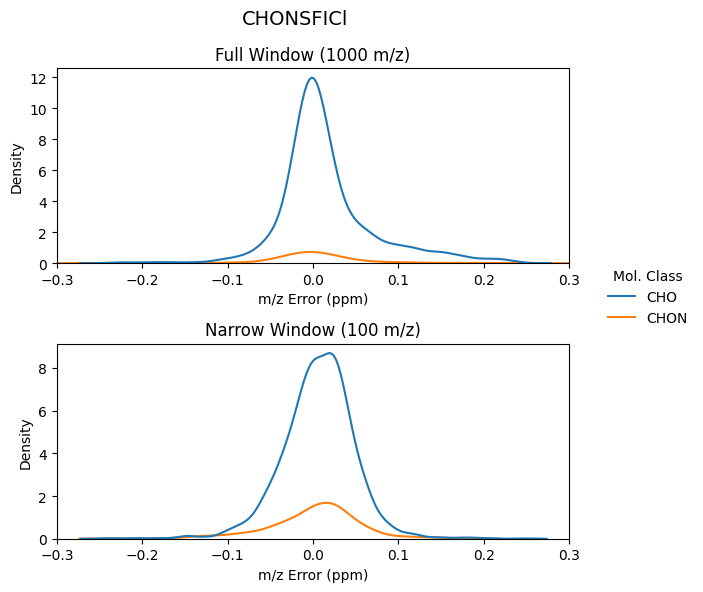

In [44]:
# plot assignment error kernel density CHON

ttt = 'CHONSFICl'  ## title for main plot

dffull = mzfull[(mzfull['mol_class']=='CHO') | (mzfull['mol_class']=='CHON')]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
sns.kdeplot(data=dffull[dffull['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax1)
ax1.set_xlim(-0.3,0.3)
ax1.set_title( 'Full Window (1000 m/z)')
legend = ax1.get_legend()
handles = legend.legendHandles
labels = dffull[dffull['mol_class']!='Unassigned']['mol_class'].unique()
legend.remove()

df100 = mz100[(mz100['mol_class']=='CHO') | (mz100['mol_class']=='CHON')]
sns.kdeplot(data=df100[df100['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax2, legend = False)
ax2.set_title( 'Narrow Window (100 m/z)')
ax2.set_xlim(-0.3,0.3)


fig.suptitle(ttt, fontsize=14)
fig.legend(handles, labels, title='Mol. Class', frameon = False, bbox_to_anchor=(1.0,0.5), loc = 'center left')

plt.tight_layout()

plt.show()


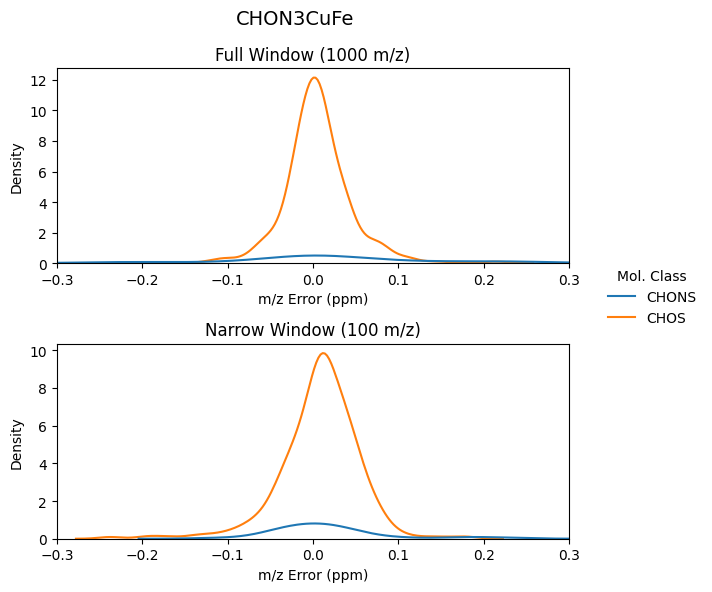

In [45]:
# plot assignment error kernel density CHON
import itertools
ttt = 'CHON3CuFe'  ## title for main plot

# set palette 
palette = itertools.cycle(sns.color_palette())



dffull = mzfull[(mzfull['mol_class']!='CHO') & (mzfull['mol_class']!='CHON')]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
sns.kdeplot(data=dffull[dffull['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax1, palette=palette)
ax1.set_xlim(-0.3,0.3)
ax1.set_title( 'Full Window (1000 m/z)')
legend = ax1.get_legend()
handles = legend.legendHandles
labels = dffull[dffull['mol_class']!='Unassigned']['mol_class'].unique()
legend.remove()

palette = itertools.cycle(sns.color_palette())

df100 = mz100[(mz100['mol_class']!='CHO') & (mz100['mol_class']!='CHON')]
sns.kdeplot(data=df100[df100['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax2, legend = False, palette=palette)
ax2.set_title( 'Narrow Window (100 m/z)')
ax2.set_xlim(-0.3,0.3)

fig.suptitle(ttt, fontsize=14)
fig.legend(handles, labels, title='Mol. Class', frameon = False, bbox_to_anchor=(1.0,0.5), loc = 'center left')

plt.tight_layout()

plt.show()


In [46]:
# create subsets of assigned features 
assigned_100mz = mz100[~mz100['Molecular Formula'].isnull()]
assigned_fullmz = mzfull[~mzfull['Molecular Formula'].isnull()]

print('400-700 m/z, 100 m/z windowing: \n%s features total; %s assigned (%.1f%%)' %(np.shape(mz100)[0],  np.shape(assigned_100mz)[0], np.shape(assigned_100mz)[0] / np.shape(mz100)[0] * 100))
print('\n200-800 m/z window (full scan): \n%s features total; %s assigned (%.1f%%)' %(np.shape(mzfull)[0],np.shape(assigned_fullmz)[0],  np.shape(assigned_fullmz)[0] / np.shape(mzfull)[0] * 100))

400-700 m/z, 100 m/z windowing: 
4470 features total; 4092 assigned (91.5%)

200-800 m/z window (full scan): 
3727 features total; 3391 assigned (91.0%)


In [47]:
# create subsets of unique features 
print('400-700 m/z, 100 m/z windowing:')
unique_100mz = lcmsfns.getUniqueFeatures(assigned_100mz)

print('\n200-800 m/z, 1000 m/z windowing:')
unique_fullmz = lcmsfns.getUniqueFeatures(assigned_fullmz)


400-700 m/z, 100 m/z windowing:

200-800 m/z, 1000 m/z windowing:


In [48]:
# subset assigned by m/z window between 400 and 700 m/z 
assigned_100mz_456 = assigned_100mz[(assigned_100mz['m/z']>=300)]
assigned_100mz_456 = assigned_100mz_456[(assigned_100mz_456['m/z']<=500)]

assigned_fullmz_456 = assigned_fullmz[(assigned_fullmz['m/z']>=300)]
assigned_fullmz_456 = assigned_fullmz_456[(assigned_fullmz_456['m/z']<=500)]

mz100_456 = mz100[(mz100['m/z']>=300)]
mz100_456 = mz100_456[(mz100_456['m/z']<=500)]

mzfull_456 = mzfull[(mzfull['m/z']>=300)]
mzfull_456 = mzfull_456[(mzfull_456['m/z']<=500)]

print('400-700 m/z, 100 m/z windowing: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mz100_456)[0],  np.shape(assigned_100mz_456)[0], np.shape(assigned_100mz_456)[0] / np.shape(mz100_456)[0] * 100))
print('\n400-700 m/z, full window: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mzfull_456)[0],np.shape(assigned_fullmz_456)[0],  np.shape(assigned_fullmz_456)[0] / np.shape(mzfull_456)[0] * 100))


400-700 m/z, 100 m/z windowing: 
4470 features total
4092 assigned (91.5%)

400-700 m/z, full window: 
2485 features total
2298 assigned (92.5%)


In [49]:
print('400-700 m/z, 100 m/z windowing:')
unique_100mz_456 = lcmsfns.getUniqueFeatures(assigned_100mz_456)

print('\n400-700 m/z, 1000 m/z windowing:')
unique_fullmz_456 = lcmsfns.getUniqueFeatures(assigned_fullmz_456)

400-700 m/z, 100 m/z windowing:

400-700 m/z, 1000 m/z windowing:


In [50]:
import matplotlib.gridspec as gridspec

mz100_bs = unique_100mz_456# lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
mzfull_bs = unique_fullmz_456 #lcmsfns.blankSubtract(unique_fullmz, blnkthresh = 0.6)

mzfull_bs_456 = mzfull_bs[(mzfull_bs['Calibrated m/z']>=300) & (mzfull_bs['Calibrated m/z']<=500)]
combo = pd.concat([mz100_bs, mzfull_bs_456], ignore_index=True)


for i in range(len(combo['m/z window'])):

    w = combo['m/z window'].iloc[i]

    if (w == '300-500 m/z') :
        
        combo['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '1000 m/z'

print(combo['m/z Window Size'].unique())


mzfull_456 = mzfull[(mzfull['Calibrated m/z']>=300) & (mzfull['Calibrated m/z']<=500)]
combo2 = pd.concat([mz100, mzfull_456], ignore_index=True)

for i in range(len(combo['m/z window'])):

    w = combo2['m/z window'].iloc[i]

    if (w == '300-500 m/z') :
        
        combo2['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo2['m/z Window Size'].iloc[i] = '1000 m/z'

print(np.shape(combo),np.shape(combo2))


['200 m/z' '1000 m/z']
(6390, 44) (6955, 41)


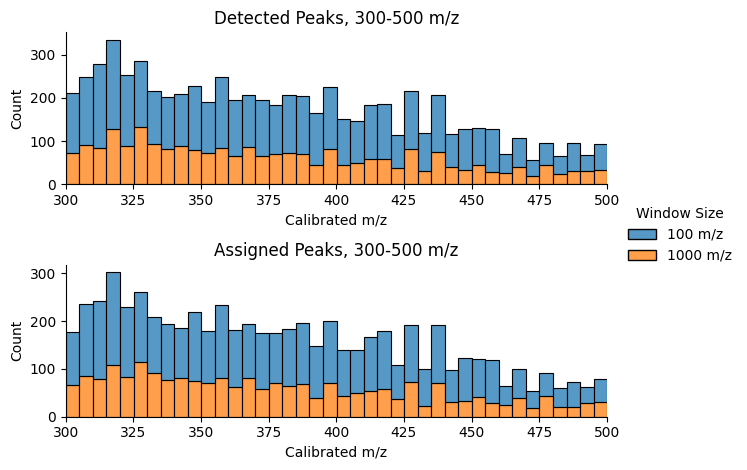

In [51]:

import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.3)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])


ax1 = plt.subplot(gs2[0])

sns.histplot(combo, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax1,binwidth=5)
ax1.set_ylabel('Count')
ax1.legend_.remove()
ax1.set_xlim(300,500)
ax1.set_title('Assigned Peaks, 300-500 m/z')
#ax1.set_ylim(0,4500)

sns.despine(ax=ax1)


ax2 = plt.subplot(gs1[0])

sns.despine(ax=ax2)

sns.histplot(combo2, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2,binwidth=5)
ax2.set_ylabel('Count')
ax2.set_xlim(300,500)
#ax2.set_ylim(0,4500)
ax2.set_title('Detected Peaks, 300-500 m/z')
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

fig.tight_layout()
plt.show()

['CHO' 'CHON' 'CHONS' 'CHOS' 'Unassigned']


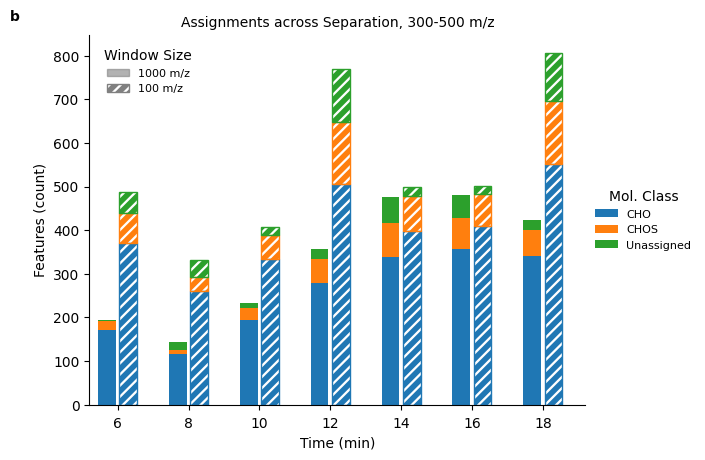

In [56]:
import matplotlib.patches as mpatches
fig, ax4 = plt.subplots()

all_results = pd.concat([mzfull[(mzfull['m/z']>=300) & (mzfull['m/z']<=500)],mz100[(mz100['m/z']>=300) & (mz100['m/z']<=500)]], ignore_index=True)

print(all_results['mol_class'].unique())
assign_summary=[]
for time in all_results['Time'].unique():    
    for w in all_results['m/z Window Size'].unique():
        current={}
        current['Time']=time
        current['m/z Window'] = w
        for mol_class in ['CHO','CHOS', 'Unassigned']:
            current[mol_class]=len(all_results[(all_results['mol_class']==mol_class) & (all_results['Time']==time) & (all_results['m/z Window Size']==w)])
        assign_summary.append(current)
df=pd.DataFrame(assign_summary)

df100 = df[df['m/z Window']=='100 m/z']

ax4 = df.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
#ax4 = df100.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
plt.rcParams['hatch.linewidth'] = 4
n = 14
for i in range(n):
    new_x = ax4.patches[i].get_x() - ((i%2)/2)
    ax4.patches[i].set_x(new_x)
    ax4.patches[i+n].set_x(new_x)
    ax4.patches[i+(2*n)].set_x(new_x)

    if (i%2)/2 > 0:
        ax4.patches[i].set_x(new_x+0.1)
        ax4.patches[i+n].set_x(new_x+0.1)
        ax4.patches[i+(2*n)].set_x(new_x+0.1)

        ax4.patches[i].set_hatch('///')
        ax4.patches[i].set_edgecolor('C0')
        ax4.patches[i].set_fill(None)
        #ax4.patches[i].set_alpha(0.7)
        ax4.patches[i+n].set_hatch('///')
        ax4.patches[i+n].set_edgecolor('C1')
        ax4.patches[i+n].set_fill(None)
        #ax4.patches[i+(2*n)].set_alpha(0.7)
        ax4.patches[i+(2*n)].set_hatch('///')
        ax4.patches[i+(2*n)].set_edgecolor('C2')
        ax4.patches[i+(2*n)].set_fill(None)



# Update tick locations correspondingly
#minor_tick_locs = [x.get_x()+1/4 for x in ax4.patches[:28]]
major_tick_locs = np.array([x.get_x()+1/4 for x in ax4.patches[:14]]).reshape(7, 2).mean(axis=1)
#ax4.set_xticks(minor_tick_locs, minor=True)
ax4.set_xticks(major_tick_locs)

# Use indices from dataframe as tick labels
major_tick_labels = df['Time'].unique()
#major_tick_labels = df_g.index.levels[0].values
#ax4.xaxis.set_ticklabels(minor_tick_labels, minor=True)
ax4.xaxis.set_ticklabels(major_tick_labels)

# Remove ticks and organize tick labels to avoid overlap
#ax4.tick_params(axis='x', which='both', bottom='off')
#ax4.tick_params(axis='x', which='minor', rotation=45)
ax4.tick_params(axis='x', which='major', pad=5, rotation=0)

ax4.set_xlabel('Time (min)')
ax4.set_ylabel('Features (count)')

leg = plt.legend(loc='center left', bbox_to_anchor=(1., 0.5), frameon=False, title='Mol. Class', prop={'size': 8})
ax4.add_artist(leg)
ax4.set_title('Assignments across Separation, 300-500 m/z',fontsize= 10)
a_val = 0.6

patch_full = mpatches.Patch(color='gray', alpha=a_val,label='1000 m/z')
patch_100 = mpatches.Patch(edgecolor='gray', facecolor = 'white', hatch = '///',label='100 m/z')



colors = ['#EA5739','#FEFFBE','#4BB05C']


#circ1 = mpatches.Patch( facecolor=colors[0],alpha=a_val,hatch=r'\\\\',label='Label1')
#circ2= mpatches.Patch( facecolor=colors[1],alpha=a_val,hatch='o',label='Label2')
#circ3 = mpatches.Patch(facecolor=colors[2],alpha=a_val,hatch='+',label='Label3')


plt.legend(handles=[patch_full, patch_100], loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon = False, title='Window Size', prop={'size': 8}) #.legend(handles = [circ1,circ2,circ3],loc=2)#.


sns.despine(ax=ax4)
ax4.text(-.15, 1.05,'b',
    horizontalalignment='center',
    verticalalignment='center',
    transform = ax4.transAxes, fontweight='bold', fontsize = 10)
sns.despine(ax=ax4)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(666, 44) (350, 44)
here


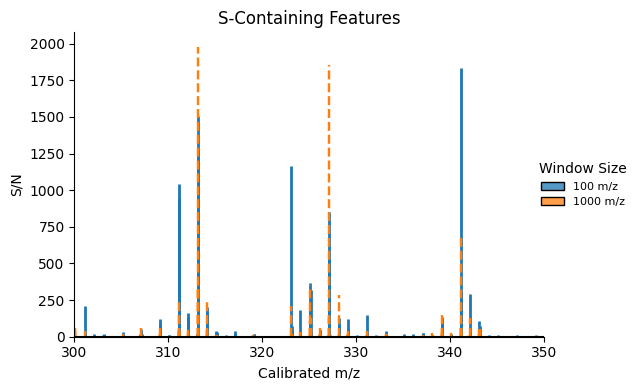

In [77]:
importlib.reload(icrms)
importlib.reload(lcmsfns)
import matplotlib.gridspec as gridspec



fig, ax2 = plt.subplots(figsize = (6.5,4))

mz100_bs = unique_100mz_456 #lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
mzfull_bs = unique_fullmz_456 #lcmsfns.blankSubtract(unique_fullmz, blnkthresh = 0.6)

mzfull_bs_456 = mzfull_bs[(mzfull_bs['Calibrated m/z']>=300) & (mzfull_bs['Calibrated m/z']<=500)]

mz100_cu = mz100_bs[(mz100_bs['Calibrated m/z']>=300) & (mz100_bs['Calibrated m/z']<=500) ]

d1=lcmsfns.normMS(mz100_cu[mz100_cu['S']>0],mz100_cu[mz100_cu['S']>0])
d2=lcmsfns.normMS(mzfull_bs_456[mzfull_bs_456['S']>0],mzfull_bs_456[mzfull_bs_456['S']>0])

#d1=mz100_bs[mz100_bs['Cu']>0]
#d2=mzfull_bs_456[mzfull_bs_456['Cu']>0]
print(np.shape(d1),  np.shape(d2))

ax2 = lcmsfns.plot_ms(df1=d1,  df2=d2, start_mz=300, end_mz=500,ax_ms=ax2, norm=False)

sns.despine(ax=ax2)

ax2.set_xlim(300,350)
ax2.set_ylim(bottom=0)
#ax2.set_title('S-Containing Features')
print('here')

ax2.legend(handles, labels, bbox_to_anchor=(0.98, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size', prop={'size': 8})

plt.tight_layout()
plt.show()

In [75]:

res = mz100_cu.loc[~mz100_cu['Molecular Formula'].isin(mzfull_bs_456['Molecular Formula'])] 
fullonly  = mzfull_bs_456.loc[~mzfull_bs_456['Molecular Formula'].isin(mz100_cu['Molecular Formula'])] 

print(np.shape(res),np.shape(mz100_cu), np.shape(mzfull_bs_456),  np.shape(fullonly))

(1156, 43) (4092, 43) (2298, 43) (27, 43)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(225, 44) (350, 44)
here


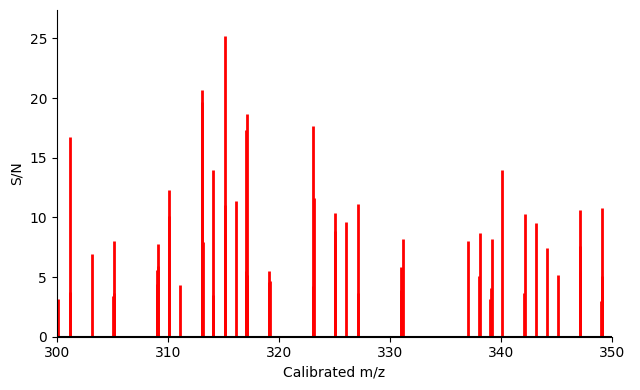

In [74]:
importlib.reload(icrms)
importlib.reload(lcmsfns)
import matplotlib.gridspec as gridspec

res = mz100_cu.loc[~mz100_cu['Molecular Formula'].isin(mzfull_bs_456['Molecular Formula'])] 

#res = mzfull_bs_456.loc[~mzfull_bs_456['Molecular Formula'].isin(mz100_cu['Molecular Formula'])] 

fig, ax2 = plt.subplots(figsize = (6.5,4))

mz100_bs = unique_100mz_456 #lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
mzfull_bs = unique_fullmz_456 #lcmsfns.blankSubtract(unique_fullmz, blnkthresh = 0.6)

mzfull_bs_456 = mzfull_bs[(mzfull_bs['Calibrated m/z']>=300) & (mzfull_bs['Calibrated m/z']<=500)]

mz100_cu = mz100_bs[(mz100_bs['Calibrated m/z']>=300) & (mz100_bs['Calibrated m/z']<=500) ]

d1=lcmsfns.normMS(mz100_cu[mz100_cu['S']>0],mz100_cu[mz100_cu['S']>0])
d1=lcmsfns.normMS(res[res['S']>0],res[res['S']>0])

#d1=mz100_bs[mz100_bs['Cu']>0]
#d2=mzfull_bs_456[mzfull_bs_456['Cu']>0]
print(np.shape(d1),  np.shape(d2))

ax2 = lcmsfns.plot_ms(df1=d1,   start_mz=300, end_mz=500,ax_ms=ax2, norm=False, colors = ['red'])

sns.despine(ax=ax2)

ax2.set_xlim(300,350)
ax2.set_ylim(bottom=0)

print('here')

#ax2.legend(box_to_anchor=(0.98, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size', prop={'size': 8})

plt.tight_layout()
plt.show()

(4092, 43)
(4092, 43)
[0 1 2 3]


ValueError: The palette list has the wrong number of colors.

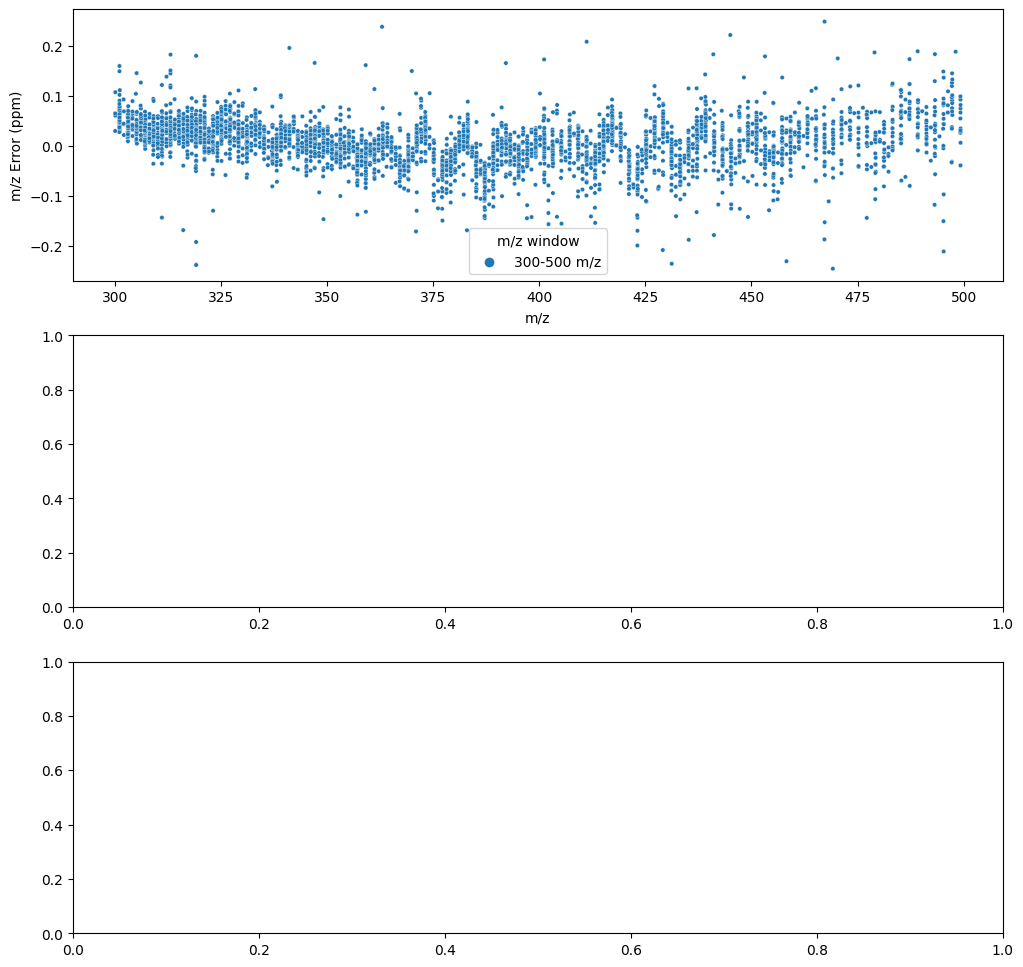

In [73]:
# 100 m/z window, error plots with blank substraction

importlib.reload(icrms)
importlib.reload(lcmsfns)
df = unique_100mz#lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
print(np.shape(unique_100mz))
print(np.shape(df))
fig = lcmsfns.plotUnique(df,ps=10)

fig.suptitle('100 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()